In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Зчитати файл
data = pd.read_csv('2017_jun_final.csv')


In [4]:
# Прочитайте отриману таблицю, використовуючи метод head
print(data.head())



   N                 Должность Язык.программирования Специализация  \
0  1        Junior QA engineer                   NaN     Manual QA   
1  2        Junior QA engineer                   NaN     Manual QA   
2  3         Software Engineer               C#/.NET           NaN   
3  4         Software Engineer            JavaScript           NaN   
4  5  Senior Software Engineer            JavaScript           NaN   

  Общий.опыт.работы Опыт.работы.на.текущем.месте  Зарплата.в.месяц  \
0               0.5                          0.5               400   
1  меньше 3 месяцев             меньше 3 месяцев               430   
2                 4                            1              2500   
3                 5                            4              2000   
4    10 и более лет                          0.5              4500   

   Изменение.зарплаты.за.12.месяцев    Город     Размер.компании  ...  \
0                                 0  Харьков       до 10 человек  ...   
1           

In [5]:

# Розмір таблиці
print("Розмір таблиці:", data.shape)

Розмір таблиці: (8704, 25)


In [6]:

# Типи стовпців
print("Типи стовпців:")
print(data.dtypes)


Типи стовпців:
N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary           

In [7]:
# Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
print("Частка пропусків в кожному стовпці:")
print(data.isnull().sum())



Частка пропусків в кожному стовпці:
N                                      0
Должность                              0
Язык.программирования               3850
Специализация                       7219
Общий.опыт.работы                      0
Опыт.работы.на.текущем.месте           0
Зарплата.в.месяц                       0
Изменение.зарплаты.за.12.месяцев       0
Город                                  0
Размер.компании                        0
Тип.компании                           0
Пол                                    0
Возраст                                0
Образование                            0
Университет                          358
Еще.студент                            0
Уровень.английского                    0
Предметная.область                   223
Дата.заполнения                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
Валюта               

In [8]:

# Видаляємо стовпці з пропусками, за винятком "Мова програмування"
columns_with_nulls = data.isnull().sum() == 0 # looking for columns which have no NaN
columns_with_nulls['Язык.программирования'] = True # setting Язык.программирования as column that we want to leave
filtered_data = data.loc[:, columns_with_nulls] # creating new df without columns with nulls (Язык.программирования excluded) 
filtered_data.head()



,N,Должность,Язык.программирования,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,Пол,Возраст,Образование,Еще.студент,Уровень.английского,Дата.заполнения,User.Agent,exp,current_job_exp,salary
0,1,Junior QA engineer,NaN,0.5,0.5,400,0,Харьков,до 10 человек,Аутсорсинговая,женский,20,Незаконченное высшее,True,ниже среднего,12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400
1,2,Junior QA engineer,NaN,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,Аутсорсинговая,женский,21,Незаконченное высшее,True,выше среднего,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430
2,3,Software Engineer,C#/.NET,4,1,2500,800,Киев,до 1000 человек,Аутсорсинговая,мужской,26,Высшее,False,средний,12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500
3,4,Software Engineer,JavaScript,5,4,2000,400,Одесса,до 200 человек,Продуктовая,мужской,30,Среднее,False,ниже среднего,12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000
4,5,Senior Software Engineer,JavaScript,10 и более лет,0.5,4500,500,Другой,до 10 человек,Продуктовая,мужской,30,Техникум / Колледж,False,средний,12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500


In [13]:

# Розрахунок частки пропусків в стовпці "Мова програмування"
missing_percentage = (filtered_data['Язык.программирования'].isnull().sum() / len(filtered_data)) * 100
# Вивід результату
print(f"Частка пропусків в стовпці 'Мова програмування': {missing_percentage}%")


Частка пропусків в стовпці 'Мова програмування': 44.232536764705884%


In [14]:
# Видаляємо усі рядки з пропусками в оригінальному DataFrame
filtered_data = filtered_data.dropna(how= 'any')
# Вивід результату
print("DataFrame без рядків з пропусками:")
print(filtered_data)



DataFrame без рядків з пропусками:
         N                 Должность Язык.программирования Общий.опыт.работы  \
2        3         Software Engineer               C#/.NET                 4   
3        4         Software Engineer            JavaScript                 5   
4        5  Senior Software Engineer            JavaScript    10 и более лет   
6        7  Junior Software Engineer               C#/.NET                 1   
7        8  Senior Software Engineer                   C++                 6   
...    ...                       ...                   ...               ...   
8692  8693         Software Engineer                  Java                 5   
8694  8695  Junior Software Engineer               C#/.NET                 1   
8695  8696         Software Engineer                Python                 1   
8701  8702  Junior Software Engineer            Ruby/Rails                 1   
8703  8704  Senior Software Engineer                  Java                 7   

    

In [15]:

# Визначення нового розміру таблиці
new_shape = filtered_data.shape
# Вивід результату
print("Новий розмір таблиці:", new_shape)




Новий розмір таблиці: (4854, 20)


In [16]:
# Створення нової таблиці python_data за умовою мови програмування - Python
python_data = data[data['Язык.программирования'] == 'Python']
print(python_data.head())


       N                 Должность Язык.программирования Специализация  \
12    13         Software Engineer                Python           NaN   
68    69         Software Engineer                Python           NaN   
87    88  Junior Software Engineer                Python           NaN   
114  115  Junior Software Engineer                Python           NaN   
143  144  Junior Software Engineer                Python           NaN   

    Общий.опыт.работы Опыт.работы.на.текущем.месте  Зарплата.в.месяц  \
12                  1             меньше 3 месяцев               800   
68                1.5                          0.5               900   
87                0.5                          0.5               600   
114               1.5                          0.5               685   
143                 1                            1               750   

     Изменение.зарплаты.за.12.месяцев Город  Размер.компании  ... Еще.студент  \
12                                200  Ки

In [17]:
#Визначте розмір таблиці python_data за допомогою методу shape
python_data_shape = python_data.shape
print(f'python data: rows - {python_data_shape[0]}, columns - {python_data_shape[1]}.')


python data: rows - 207, columns - 25.


In [18]:
# Використовуючи метод groupby, виконайте групування за стовпчиком "Посада"
grouped = python_data.groupby('Должность')
position_aggregated_data = grouped['Зарплата.в.месяц'].agg(['min', 'max', 'mean', 'count'])
position_aggregated_data



,min,max,mean,count
Должность,,,,
Junior Software Engineer,100,1250,560.841270,63
Senior Software Engineer,1300,9200,3387.096774,31
Software Engineer,500,5400,1799.070000,100
System Architect,3000,5000,4000.000000,2
Technical Lead,1425,6200,3165.909091,11


In [19]:
# Створіть новий DataFrame, де для згрупованих даних за стовпчиком "Посада", виконайте агрегацію даних за допомогою методу agg і знайдіть мінімальне та максимальне значення у стовпці "Зарплата.в.місяць"
position_aggregated_data = grouped['Зарплата.в.месяц'].agg(['min', 'max', 'mean', 'count'])
print(position_aggregated_data.tail())


                           min   max         mean  count
Должность                                               
Junior Software Engineer   100  1250   560.841270     63
Senior Software Engineer  1300  9200  3387.096774     31
Software Engineer          500  5400  1799.070000    100
System Architect          3000  5000  4000.000000      2
Technical Lead            1425  6200  3165.909091     11


In [12]:


# Функція, яка повертає значення зарплати на місяць
def fill_avg_salary(row):
    return row[['min','max']].mean()

min_max_avg = position_aggregated_data.apply(fill_avg_salary, axis = 1)
position_aggregated_data_extended = pd.concat([position_aggregated_data, min_max_avg], axis=1)
position_aggregated_data_extended.rename(columns = {0:'min_max_avg'}, inplace = True)
position_aggregated_data_extended



,min,max,mean,count,min_max_avg
Должность,,,,,
Junior Software Engineer,100,1250,560.841270,63,675.0
Senior Software Engineer,1300,9200,3387.096774,31,5250.0
Software Engineer,500,5400,1799.070000,100,2950.0
System Architect,3000,5000,4000.000000,2,4000.0
Technical Lead,1425,6200,3165.909091,11,3812.5


In [11]:
# Описова статистика для нового стовпчика "avg"
statistics = position_aggregated_data['mean'].describe()
statistics

filename: str = 'position_statistics.csv'
position_aggregated_data.to_csv(filename, index=True)
print(f'Data saved to {filename}.')

Data saved to position_statistics.csv.


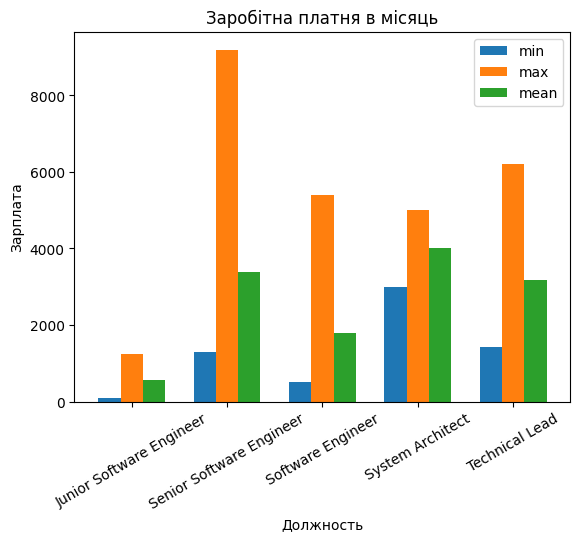

In [20]:
plot_data = position_aggregated_data.drop('count', axis=1)
plot_data.plot.bar(title="Заробітна платня в місяць", ylabel="Зарплата", rot=30, width=0.70)
plt.show()

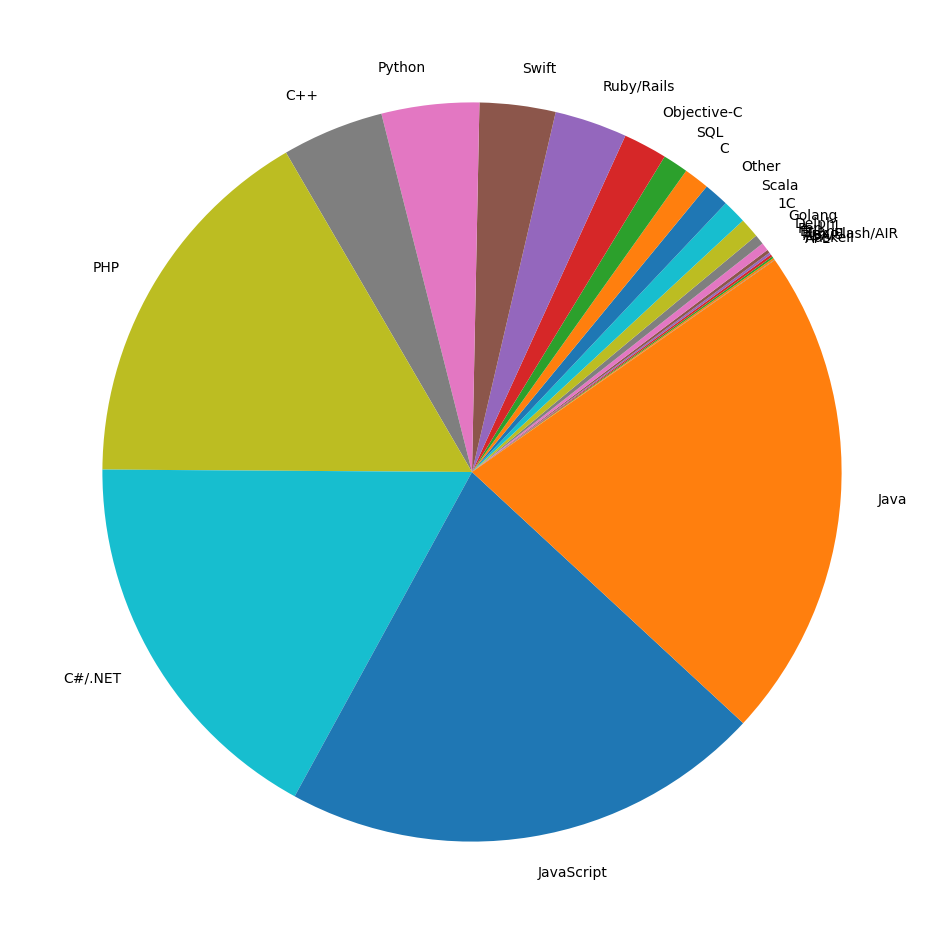

In [21]:
plot_data= filtered_data.groupby('Язык.программирования').agg('count')['N'].sort_values()
plot_data.plot.pie(figsize=(12,12), legend=False, ylabel="", startangle=35, labeldistance=1.1)
plt.show()